In [1]:
import soundfile as sf
import torch

def load_audio(path):
    """Load audio file as torch tensor with shape (channels, samples)."""
    data, sample_rate = sf.read(path)
    waveform = torch.from_numpy(data).float()
    if waveform.dim() == 1:
        waveform = waveform.unsqueeze(0)  # mono: add channel dimension
    else:
        waveform = waveform.T  # stereo: transpose to (channels, samples)
    return waveform, sample_rate

waveform, sample_rate = load_audio("9.wav")

print(f"Waveform shape: {waveform.shape}")
print(f"Sample rate: {sample_rate}")
print(f"Duration: {waveform.shape[1] / sample_rate:.2f} seconds")
print(f"Channels: {waveform.shape[0]}")


Waveform shape: torch.Size([1, 39952])
Sample rate: 44100
Duration: 0.91 seconds
Channels: 1


In [2]:
import torchaudio

In [3]:
print(f"Data type: {waveform.dtype}")
print(f"Min value: {waveform.min():.4f}")
print(f"Max value: {waveform.max():.4f}")
print(f"Mean: {waveform.mean():.4f}")


Data type: torch.float32
Min value: -0.0770
Max value: 0.0790
Mean: -0.0001


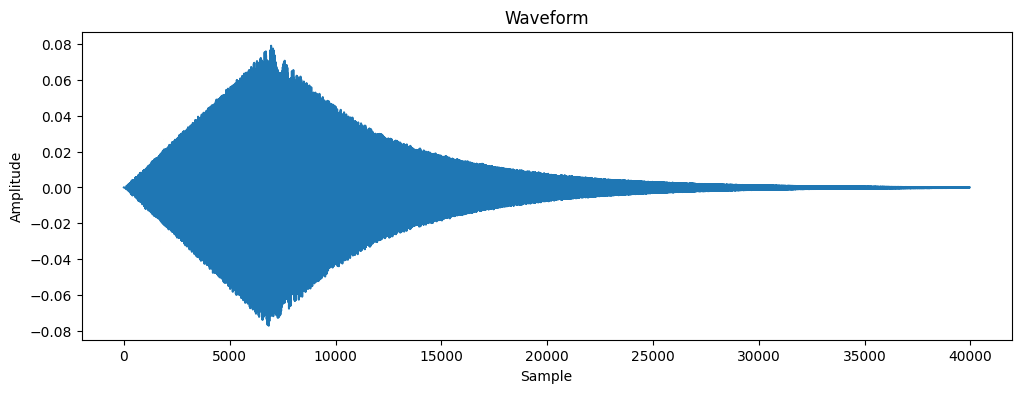

In [4]:
import matplotlib.pyplot as plt

# If stereo, take the first channel for plotting
audio = waveform[0] if waveform.shape[0] > 1 else waveform.squeeze()

plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


In [5]:
# Create a spectrogram transform
spectrogram_transform = torchaudio.transforms.Spectrogram(
    n_fft=1024,
    hop_length=512
)

# Apply it to the waveform
spectrogram = spectrogram_transform(waveform)

print(f"Spectrogram shape: {spectrogram.shape}")
# Shape is (channels, frequency_bins, time_frames)


Spectrogram shape: torch.Size([1, 513, 79])


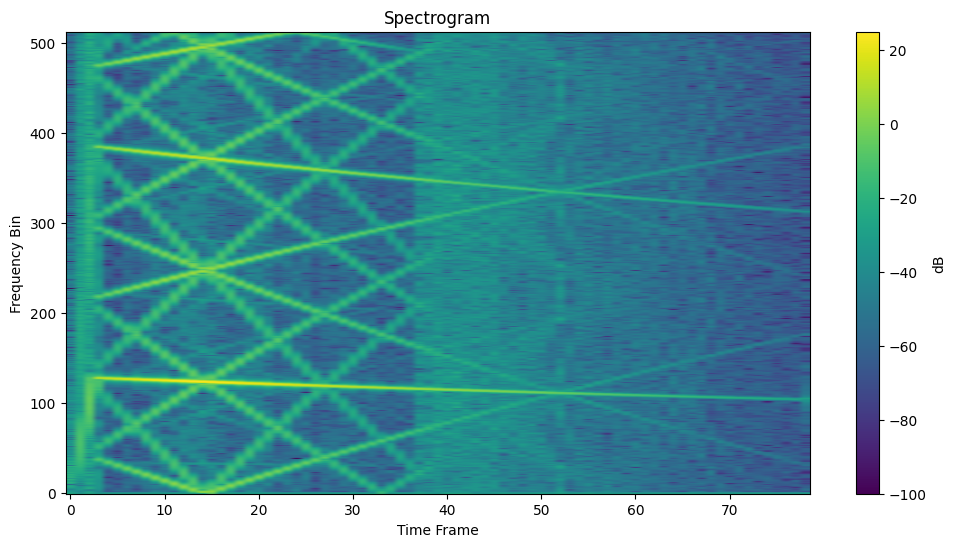

In [6]:
# Convert to decibels for better visualization
spectrogram_db = torchaudio.transforms.AmplitudeToDB()(spectrogram)

plt.figure(figsize=(12, 6))
plt.imshow(
    spectrogram_db[0],  # First channel
    aspect='auto',
    origin='lower',
    cmap='viridis'
)
plt.colorbar(label='dB')
plt.title("Spectrogram")
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.show()
